<a href="https://colab.research.google.com/github/gusmaomarcos/alura/blob/main/previsao_com_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 12

In [ ]:
url='https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'
passageiros = pd.read_csv(url)

In [ ]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


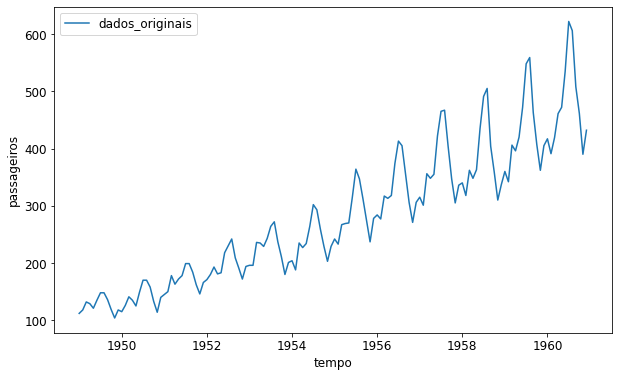

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dados_originais')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
dado_escalado = sc.transform(passageiros)

In [ ]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

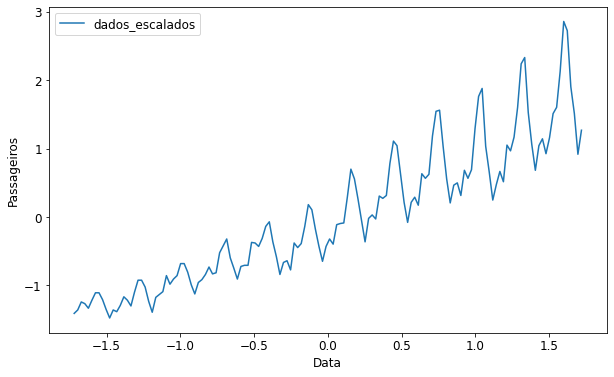

In [ ]:
sns.lineplot(x=x, y=y, label='dados_escalados')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [ ]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [ ]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [ ]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

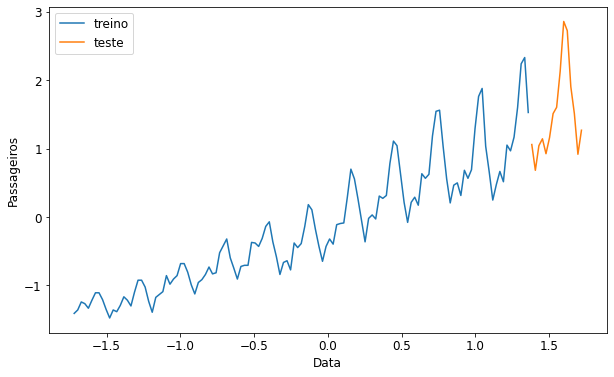

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

Objetivo é a previsão dos dados 'futuros' em laranja.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))

In [ ]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 1s 3ms/step - loss: 0.1285


In [ ]:
y_predict = regressor.predict(xtreino)

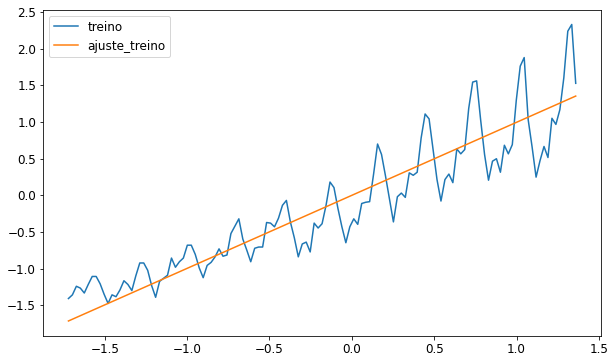

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

In [ ]:
d = {'tempo':xtreino, 'passageiros':y_predict[:,0]}

In [ ]:
resultados = pd.DataFrame(d)
resultados

,tempo,passageiros
0,-1.720064,-1.713961
1,-1.696007,-1.689989
2,-1.671950,-1.666018
3,-1.647894,-1.642046
4,-1.623837,-1.618075
...,...,...
124,1.262984,1.258503
125,1.287041,1.282474
126,1.311098,1.306446
127,1.335155,1.330417


In [ ]:
resultado_tranf = sc.inverse_transform(resultados)

In [ ]:
resultado_tranf = pd.DataFrame(resultado_tranf)
resultado_tranf.columns = ['tempo', 'passageiros']

In [ ]:
resultado_tranf

,tempo,passageiros
0,1949.000000,75.396244
1,1949.083333,78.262007
2,1949.166667,81.127769
3,1949.250000,83.993532
4,1949.333333,86.859308
...,...,...
124,1959.333333,430.751405
125,1959.416667,433.617182
126,1959.500000,436.482944
127,1959.583333,439.348693


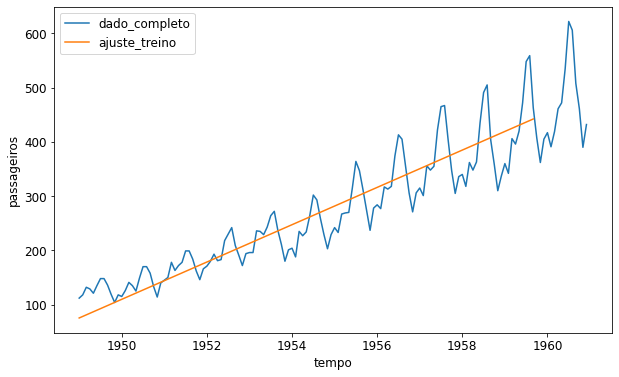

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_tranf, label='ajuste_treino')

In [ ]:
y_predict_teste = regressor.predict(xteste)

In [ ]:
d = {'tempo':xteste, 'passageiros':y_predict_teste[:,0]}

In [ ]:
resultados_teste = pd.DataFrame(data=d)

In [ ]:
resultados_transf_teste = sc.inverse_transform(resultados_teste)

In [ ]:
resultados_transf_teste = pd.DataFrame(resultados_transf_teste)

In [ ]:
resultados_transf_teste.columns = ['tempo', 'passageiros']

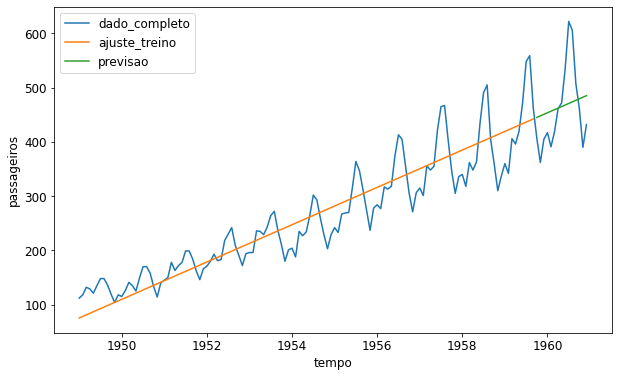

In [ ]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_tranf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultados_transf_teste, label='previsao')


In [ ]:
regressor2 = Sequential()

In [ ]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [ ]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8269
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8195
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8161
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8136
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8094
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8057
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8021
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7999
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7982
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7982
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7978
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7965
Epoch 13/200
5/5 [==============================] - 0s 4ms/st

In [ ]:
y_predict=regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

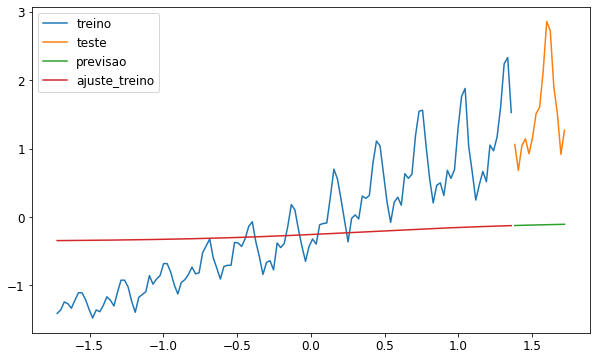

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsao')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

In [ ]:
import numpy as np

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
def separa_dados(vetor, n_passos):
  x_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    x_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  x_novo, y_novo = np.array(x_novo), np.array(y_novo)
  return x_novo, y_novo

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [ ]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [ ]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]


In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [ ]:
regressor3 = Sequential()

In [ ]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [ ]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7958
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7555
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7282
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7124
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6955
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6739
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6532
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6248
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6001
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5689
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5358
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5002
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [ ]:
y_predict_novo = regressor3.predict(xtreino_novo)

In [ ]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [ ]:
resultado=pd.DataFrame(y_predict_teste_novo)[0]

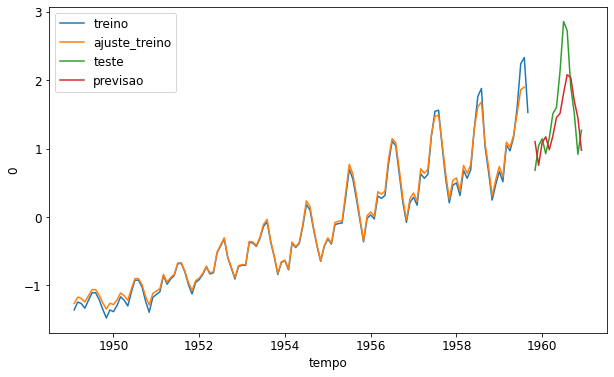

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsao')
plt.savefig('passo4.jpg')

In [ ]:
url2 = "https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv"
bike = pd.read_csv(url2)

In [ ]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

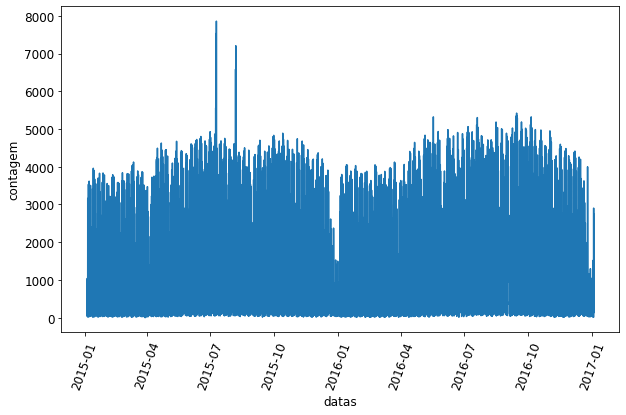

In [ ]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [ ]:
sc2 = StandardScaler()

In [ ]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [ ]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [ ]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

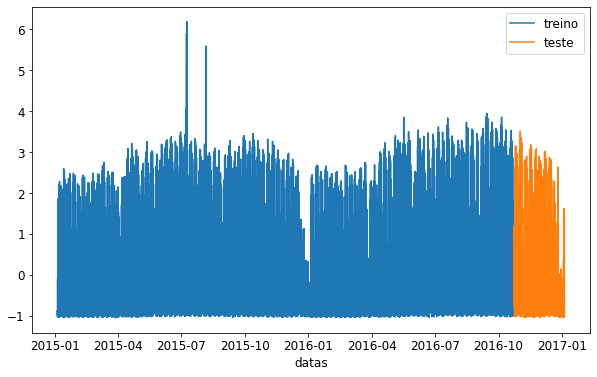

In [ ]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [ ]:
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

In [ ]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [ ]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
recorrente = Sequential()

In [ ]:
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [ ]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [ ]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 10s 15ms/step - loss: 0.2700 - val_loss: 0.1433
Epoch 2/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0784 - val_loss: 0.0625
Epoch 3/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0545 - val_loss: 0.0467
Epoch 4/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0458 - val_loss: 0.0379
Epoch 5/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0421 - val_loss: 0.0241
Epoch 6/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0391 - val_loss: 0.0298
Epoch 7/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0370 - val_loss: 0.0237
Epoch 8/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0352 - val_loss: 0.0421
Epoch 9/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0335 - val_loss: 0.0192
Epoch 10/100
490/490 [==============================] - 7s 14ms/step - loss: 0.03

In [ ]:
y_ajustado = recorrente.predict(xtreino_novo)

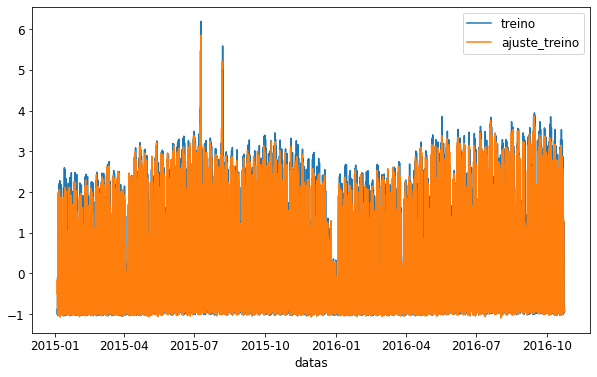

In [ ]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[0:15662], label='ajuste_treino')

In [ ]:
y_predito = recorrente.predict(xteste_novo)

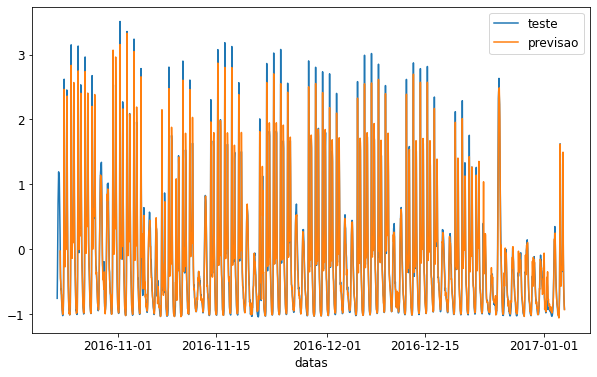

In [ ]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsao')

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
recorrente_g = Sequential()

In [ ]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [ ]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [ ]:
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 9s 13ms/step - loss: 0.2126 - val_loss: 0.0676
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0646 - val_loss: 0.0458
Epoch 3/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0481 - val_loss: 0.0347
Epoch 4/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0410 - val_loss: 0.0258
Epoch 5/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0375 - val_loss: 0.0273
Epoch 6/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0355 - val_loss: 0.0461
Epoch 7/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0336 - val_loss: 0.0210
Epoch 8/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0327 - val_loss: 0.0180
Epoch 9/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0318 - val_loss: 0.0199
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.030

In [ ]:
y_predito2 = recorrente_g.predict(xteste_novo)

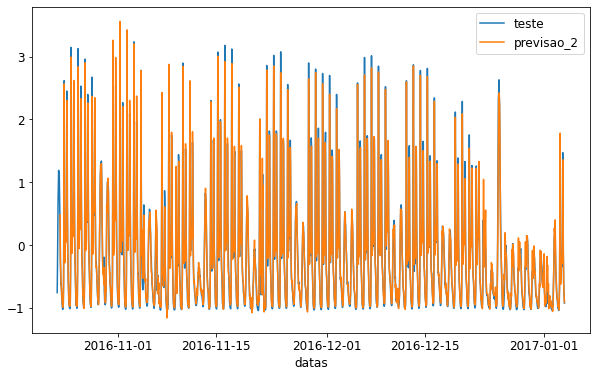

In [ ]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsao_2')

In [ ]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


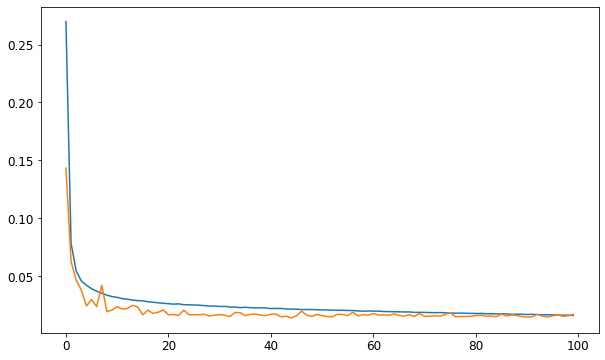

In [ ]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])

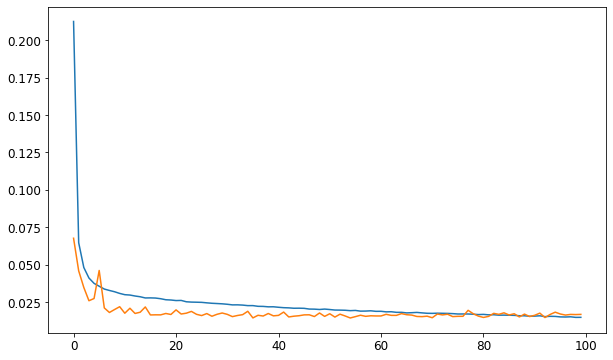

In [ ]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])